In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


In [3]:
data = pd.read_csv('Model_selection_data.csv')

In [8]:
X = np.array(data[['x1' , 'x2']])
y = np.array(data['y'])

In [151]:
data = np.array(pd.read_csv('Model_selection_data.csv'))
X = data[:,0:2]
y = data[:,2]

In [152]:
y.shape[0] #returns the dimensionality of the dataset

100

In [153]:
def randomize(X,y): #randomizing data because apparently it's a good thing, it is jk..
    perm = np.random.permutation(y.shape[0]) #generating a random set of numbers between 0 and the number of dims
    X1 = X[perm] #shuffling features
    y1 = y[perm] #shuffling labels
    return X1, y1

In [202]:
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, cv_scores = learning_curve(estimator, X, y, cv = None, n_jobs = None,
                                                           train_sizes = np.linspace(.1, 1.0, num_trainings))
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_stddev = np.std(train_scores, axis = 1)
    cv_scores_mean = np.mean(cv_scores, axis = 1)
    cv_scores_stddev = np.std(cv_scores, axis = 1)
    
    print(train_sizes)
    print(train_scores)
    print(cv_scores)
    
    plt.grid()
    plt.title('Learning Curves')
    plt.xlabel('used_data_points')
    plt.ylabel('Scores')
    plt.plot(train_scores_mean, '-o', color = 'g', label = 'Training Score')
    plt.plot(cv_scores_mean, '-o', color = 'y', label = 'CV Score')
    plt.show()
    
     

[ 8 26 44 62 80]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.55 0.5  0.5  0.5  0.5 ]
 [0.55 0.5  0.5  0.5  0.5 ]
 [0.45 0.5  0.5  0.5  0.5 ]
 [0.45 0.5  0.5  0.5  0.55]
 [0.5  0.55 0.55 0.5  0.5 ]]


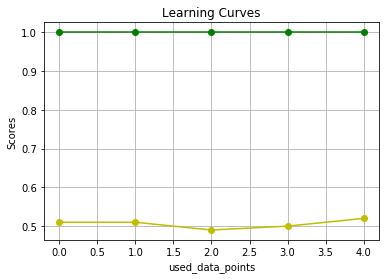

In [211]:
from sklearn.linear_model import LogisticRegression as lg #underfit
from sklearn.ensemble import GradientBoostingClassifier as gbc #overfit
from sklearn.svm import SVC #overoverfit lmao

np.random.seed(55)
X,y = randomize(X,y)
estimator = SVC(kernel = 'rbf', gamma = 1000)
# estimator = gbc()
draw_learning_curves(X, y, estimator, 5)